In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
datasets = ["Genes_SalivaDB", "Metabolites_SalivaDB", "Microbes_SalivaDB", "Mirnas_SalivaDB", "Proteins_SalivaDB" ]

In [ ]:
frames = []
def import_df(arr):
  for x in arr:
    df_name = x[:3] + '_df'
    df = pd.read_csv('/content/'+ x,sep='\t')
    df = df.drop(['Exosomal/Non-exosomal'], axis=1)
    df = df.drop(['Biomarker_Type'], axis=1)  
    df['Target'] = df['Disease_name'].apply(lambda x: 1 if x == 'Oral Cancer' else 0)
    df.dropna()

    print(df_name)
    
    frames.append(df)

In [ ]:
import_df(datasets)

Gen_df
Met_df
Mic_df
Mir_df
Pro_df


In [ ]:
final_df = pd.concat(frames)

In [ ]:
final_df.dropna()
df2 = final_df[final_df['Target'] == 1]

In [ ]:
df2

,SAL_ID,Collection_Method,Collection_site,Disease_Category,Disease_name,Fold_Change,Regulation,Organism,Biomarker,Target
0,SAL_25236,Saliva samples were collected using an Oragene...,Whole Saliva,Cancer,Oral Cancer,2.624,Upregulated,Homo sapiens,Gene,1
1,SAL_25237,Saliva samples were collected using an Oragene...,Whole Saliva,Cancer,Oral Cancer,2.068,Upregulated,Homo sapiens,Gene,1
2,SAL_25238,Saliva samples were collected using an Oragene...,Whole Saliva,Cancer,Oral Cancer,2.91,Upregulated,Homo sapiens,Gene,1
3,SAL_25239,Saliva samples were collected using an Oragene...,Whole Saliva,Cancer,Oral Cancer,2.794,Upregulated,Homo sapiens,Gene,1
4,SAL_25240,Saliva samples were collected using an Oragene...,Whole Saliva,Cancer,Oral Cancer,2.529,Upregulated,Homo sapiens,Gene,1
...,...,...,...,...,...,...,...,...,...,...
5391,SAL_15392,NaN,Whole Saliva,Cancer,Oral Cancer,NaN,Upregulated,Homo sapiens,Protein,1
5985,SAL_15986,Whole unstimulated saliva was collected betwee...,Whole Saliva,Cancer,Oral Cancer,1.15841584,Upregulated,Homo sapiens,Protein,1
5986,SAL_15987,Whole unstimulated saliva was collected betwee...,Whole Saliva,Cancer,Oral Cancer,1.45274472,Upregulated,Homo sapiens,Protein,1
5987,SAL_15988,Whole unstimulated saliva was collected betwee...,Whole Saliva,Cancer,Oral Cancer,2.5872093,Upregulated,Homo sapiens,Protein,1


In [ ]:

final_df.shape

(15821, 19)

In [ ]:
df2.shape

In [ ]:
final_df.head(2)

,SAL_ID,Biomarker_Name,Sampling_Method,Collection_Method,Analysis_Method,Collection_site,Disease_Category,Disease_name,Disease_subtype,Fold_Change,Regulation,Organism,PMID,Year_of_Publication,ID,Biomarker,Sequence,Target,SMILES
0,SAL_25236,NUS1,This study included 41 OSCC patients and 10 he...,Saliva samples were collected using an Oragene...,qRT-PCR,Whole Saliva,Cancer,Oral Cancer,Oral Squamous Cell Carcinoma,2.624,Upregulated,Homo sapiens,32871760,2020,NUS1,Gene,GTACTACTGGGGGCGGGGCTGCCAAGGGAGGAGGAAGATGGCGGCG...,1,NaN
1,SAL_25237,RCN1,This study included 41 OSCC patients and 10 he...,Saliva samples were collected using an Oragene...,qRT-PCR,Whole Saliva,Cancer,Oral Cancer,Oral Squamous Cell Carcinoma,2.068,Upregulated,Homo sapiens,32871760,2020,RCN1,Gene,AGTCCCCTCCTCCGCGCCGGCCCCAACCCTGTCGCTGCCGCCGCGC...,1,NaN


In [ ]:
# final_df = final_df.drop(['SMILES'], axis=1)
# final_df = final_df.drop(['Disease_subtype'], axis=1)
# final_df = final_df.drop(['Biomarker_Name'], axis=1)
# final_df = final_df.drop(['Sampling_Method'], axis=1)
# final_df = final_df.drop(['Disease_subtype'], axis=1)
final_df = final_df.drop(['PMID'], axis=1)
final_df = final_df.drop(['ID'], axis=1)
final_df = final_df.drop(['Sequence'], axis=1)
final_df = final_df.drop(['Analysis_Method'], axis=1)
final_df = final_df.drop(['Year_of_Publication'], axis=1)

In [ ]:
final_df.head()

,SAL_ID,Collection_Method,Collection_site,Disease_Category,Disease_name,Fold_Change,Regulation,Organism,Biomarker,Target
0,SAL_25236,Saliva samples were collected using an Oragene...,Whole Saliva,Cancer,Oral Cancer,2.624,Upregulated,Homo sapiens,Gene,1
1,SAL_25237,Saliva samples were collected using an Oragene...,Whole Saliva,Cancer,Oral Cancer,2.068,Upregulated,Homo sapiens,Gene,1
2,SAL_25238,Saliva samples were collected using an Oragene...,Whole Saliva,Cancer,Oral Cancer,2.91,Upregulated,Homo sapiens,Gene,1
3,SAL_25239,Saliva samples were collected using an Oragene...,Whole Saliva,Cancer,Oral Cancer,2.794,Upregulated,Homo sapiens,Gene,1
4,SAL_25240,Saliva samples were collected using an Oragene...,Whole Saliva,Cancer,Oral Cancer,2.529,Upregulated,Homo sapiens,Gene,1


In [ ]:
df = final_df.dropna()

In [ ]:
final_df.head()

,SAL_ID,Collection_Method,Collection_site,Disease_Category,Disease_name,Fold_Change,Regulation,Organism,Biomarker,Target
0,SAL_25236,Saliva samples were collected using an Oragene...,Whole Saliva,Cancer,Oral Cancer,2.624,Upregulated,Homo sapiens,Gene,1
1,SAL_25237,Saliva samples were collected using an Oragene...,Whole Saliva,Cancer,Oral Cancer,2.068,Upregulated,Homo sapiens,Gene,1
2,SAL_25238,Saliva samples were collected using an Oragene...,Whole Saliva,Cancer,Oral Cancer,2.91,Upregulated,Homo sapiens,Gene,1
3,SAL_25239,Saliva samples were collected using an Oragene...,Whole Saliva,Cancer,Oral Cancer,2.794,Upregulated,Homo sapiens,Gene,1
4,SAL_25240,Saliva samples were collected using an Oragene...,Whole Saliva,Cancer,Oral Cancer,2.529,Upregulated,Homo sapiens,Gene,1


Logistic Regression accuracy: 0.965
Decision Tree accuracy: 0.958
Random Forest accuracy: 0.959
AdaBoost accuracy: 0.970
Gradient Boosting accuracy: 0.967


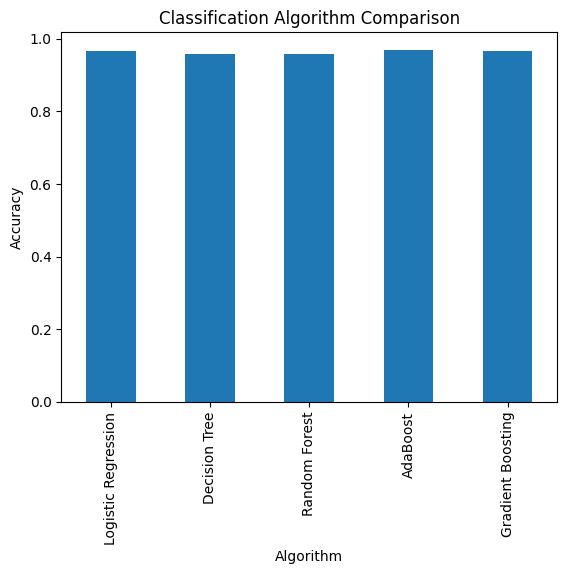

Decision Tree RMSE: 0.175, R^2: 0.476
Random Forest RMSE: 0.168, R^2: 0.519
AdaBoost RMSE: 0.173, R^2: 0.489
Gradient Boosting RMSE: 0.157, R^2: 0.580


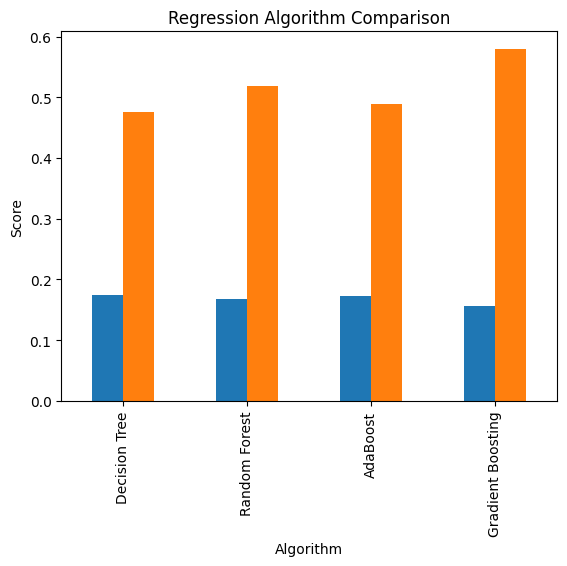

In [ ]:

X = pd.get_dummies(final_df[["Collection_site", "Disease_Category", "Fold_Change", "Regulation", "Biomarker"]])
y  = final_df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# apply and compare classification algorithms
class_models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
]

class_scores = []
for name, model in class_models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f'{name} accuracy: {acc:.3f}')
    class_scores.append((name, acc))

class_df = pd.DataFrame(class_scores, columns=['Algorithm', 'Accuracy'])
class_df.plot(kind='bar', x='Algorithm', y='Accuracy', legend=False)
plt.title('Classification Algorithm Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.savefig("Classification Algorithm Comparison.png")
plt.show()

# apply and compare regression algorithms
reg_models = [
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('AdaBoost', AdaBoostRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
]

reg_scores = []
for name, model in reg_models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} RMSE: {rmse:.3f}, R^2: {r2:.3f}')
    reg_scores.append((name, rmse, r2))

reg_df = pd.DataFrame(reg_scores, columns=['Algorithm', 'RMSE', 'R^2'])
reg_df.plot(kind='bar', x='Algorithm', y=['RMSE', 'R^2'], legend=False)
plt.title('Regression Algorithm Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.savefig("Regression Algorithm Comparison.png")
plt.show()

Training DecisionTreeClassifier...
Accuracy: 0.9582938388625593
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      2968
           1       0.68      0.61      0.65       197

    accuracy                           0.96      3165
   macro avg       0.83      0.80      0.81      3165
weighted avg       0.96      0.96      0.96      3165



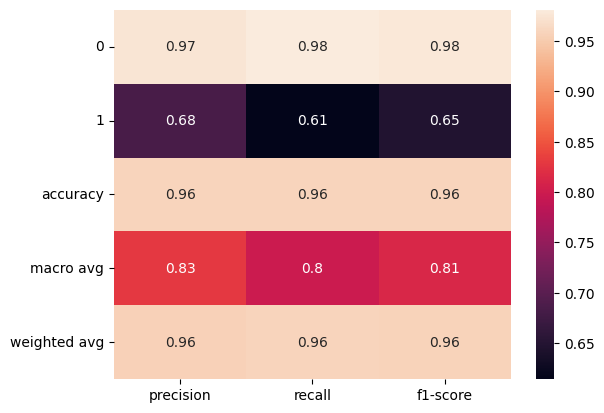


Training LogisticRegression...
Accuracy: 0.9649289099526066
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2968
           1       0.71      0.73      0.72       197

    accuracy                           0.96      3165
   macro avg       0.85      0.86      0.85      3165
weighted avg       0.97      0.96      0.97      3165



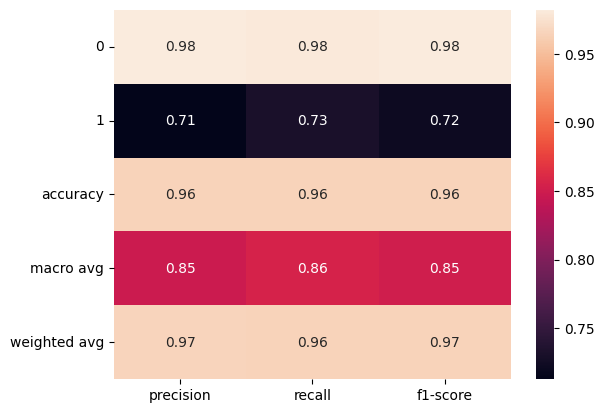


Training KNeighborsClassifier...
Accuracy: 0.9563981042654028
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      2968
           1       0.64      0.68      0.66       197

    accuracy                           0.96      3165
   macro avg       0.81      0.83      0.82      3165
weighted avg       0.96      0.96      0.96      3165



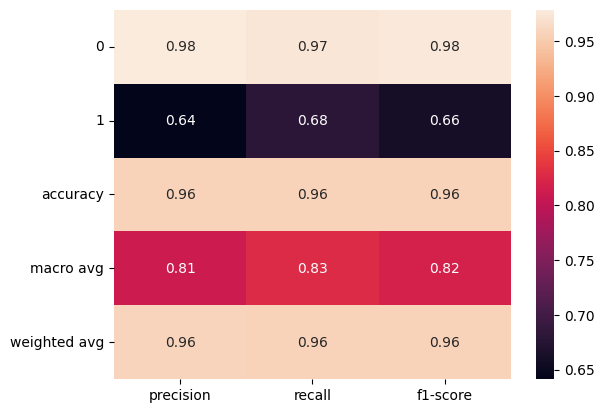


Training GaussianNB...
Accuracy: 0.882780410742496
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.93      2968
           1       0.34      0.94      0.50       197

    accuracy                           0.88      3165
   macro avg       0.67      0.91      0.72      3165
weighted avg       0.96      0.88      0.91      3165



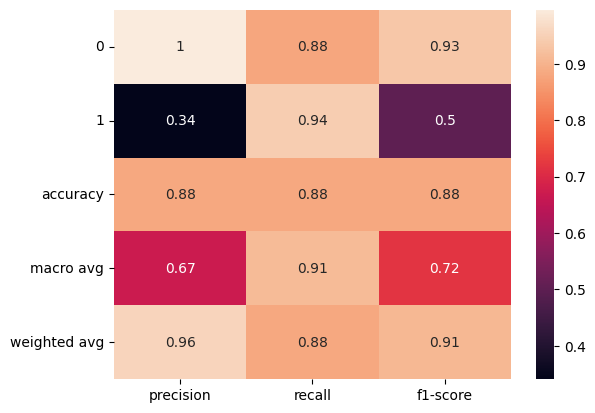


Training SVC...
Accuracy: 0.9699842022116903
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      2968
           1       0.75      0.78      0.76       197

    accuracy                           0.97      3165
   macro avg       0.87      0.88      0.87      3165
weighted avg       0.97      0.97      0.97      3165



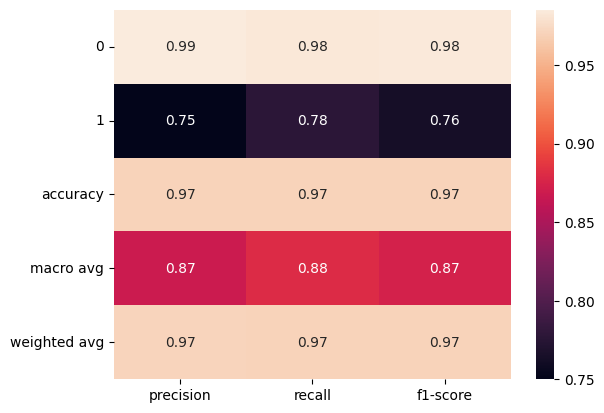


Training RandomForestClassifier...
Accuracy: 0.958609794628752
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      2968
           1       0.69      0.61      0.65       197

    accuracy                           0.96      3165
   macro avg       0.83      0.80      0.81      3165
weighted avg       0.96      0.96      0.96      3165



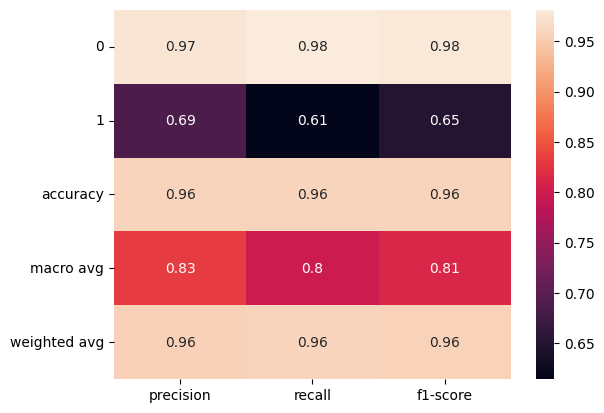


Training MLPClassifier...
Accuracy: 0.9598736176935229
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      2968
           1       0.70      0.62      0.66       197

    accuracy                           0.96      3165
   macro avg       0.84      0.80      0.82      3165
weighted avg       0.96      0.96      0.96      3165



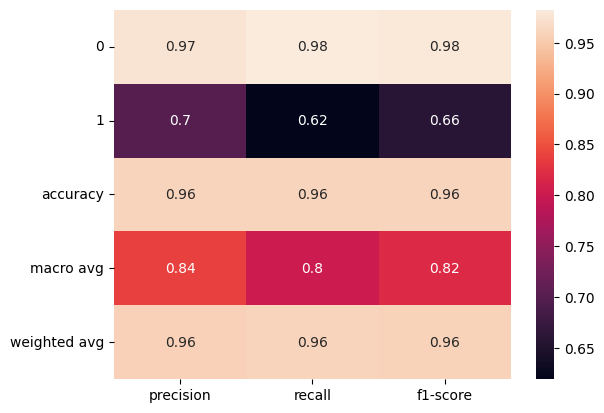


Training GradientBoostingClassifier...
Accuracy: 0.9671406003159557
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      2968
           1       0.71      0.79      0.75       197

    accuracy                           0.97      3165
   macro avg       0.85      0.89      0.87      3165
weighted avg       0.97      0.97      0.97      3165



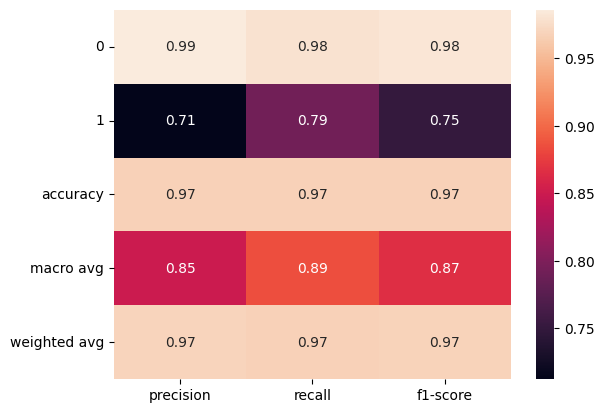


Training AdaBoostClassifier...
Accuracy: 0.9696682464454977
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2968
           1       0.75      0.76      0.76       197

    accuracy                           0.97      3165
   macro avg       0.87      0.87      0.87      3165
weighted avg       0.97      0.97      0.97      3165



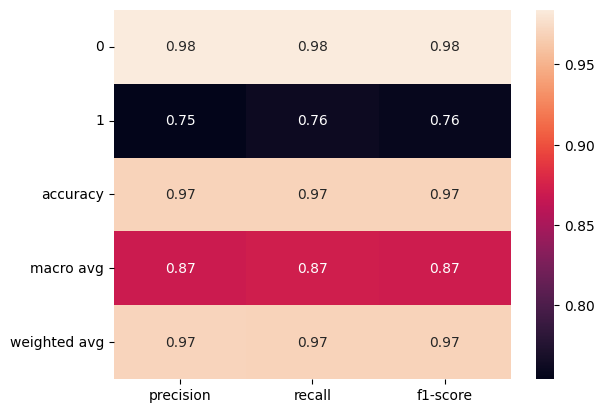

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns


X = pd.get_dummies(final_df[["Collection_site", "Disease_Category", "Fold_Change", "Regulation", "Biomarker"]])
y  = final_df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classification models
models = [
    DecisionTreeClassifier(),
    LogisticRegression(),
    KNeighborsClassifier(),
    GaussianNB(),
    SVC(),
    RandomForestClassifier(),
    MLPClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier()
]

# Train and evaluate classification models
n=1
for model in models:
    print(f"Training {model.__class__.__name__}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    # print(y_test)
    # print(y_pred)
    
    print(f"Classification Report:\n {classification_report(y_test, y_pred)}")

    rep = classification_report(y_test, y_pred,
                                   output_dict=True)
    sns.heatmap(pd.DataFrame(rep).iloc[:-1, :].T, annot=True)
    
    plt.savefig("/content/"+model.__class__.__name__ + ".png")
    plt.show()

    print()